In [0]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import RegexpTokenizer
from nltk.corpus import brown

import gensim

from sklearn.decomposition import PCA

from matplotlib import pyplot

In [2]:
forgooglecolab = True
if forgooglecolab:
  from google.colab import files
  uploaded = files.upload()

Saving got1.txt to got1.txt


In [0]:
if forgooglecolab:
  filepath = "got1.txt"
else:
  filepath = "../data/got1.txt"

file = open(filepath)
lines = file.readlines()

In [0]:
for index, line in enumerate(lines):
  if "PROLOGUE" in line:
    lines = lines[index+1:]

for index, line in enumerate(lines):
  if "APPENDIX" in line:
    lines = lines[:index]

sentences = []
for line in lines:
  if len(line) > 1:
    for sentence in sent_tokenize(line):
      sentences.append(sentence)
      #print(sentence)

In [0]:
stop_words = set(stopwords.words("english"))
tokenizer = RegexpTokenizer(r'\w+')
filtered_sentences = []

for sentence in sentences:
  sent = []
  strspace = " "
  #print(sent.join(tokenizer.tokenize(str(sentence))))
  for word in word_tokenize( " ".join(tokenizer.tokenize(str(sentence)))):
    if word not in list(stop_words):
      sent.append(word.lower())
  filtered_sentences.append(sent)

#print(filtered_sentences[:100])

In [0]:
model = gensim.models.Word2Vec(filtered_sentences, size=100, window=5, min_count=1, workers=4)

In [0]:
words = list(model.wv.vocab)

In [20]:
x = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [24]:
# print(model['winterfell'])
# print(model['riverrun'])
# print(model['lannisport'])

x2 = []
x2.append(model['winterfell'])
x2.append(model['riverrun'])
x2.append(model['lannisport'])
x2.append(model['jon'])
x2.append(model['sansa'])
x2.append(model['daenerys'])

names = ['winterfell', 'riverrun', 'lannisport', 'jon', 'sansa', 'daenerys']

result = pca.fit_transform(x2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Met

In [0]:
def plotlist(list):
  x = []
  for element in list:
    x.append(model[element])

  result = pca.fit_transform(x)
  pyplot.scatter(result[:, 0], result[:, 1])
  for i, word in enumerate(list):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
  pyplot.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


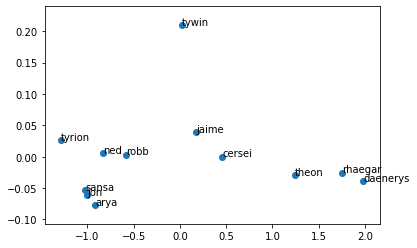

In [44]:
characters = [
              'jon',
              'sansa',
              'arya',
              'daenerys',
              'theon',
              'robb',
              'cersei',
              'ned',
              'rhaegar',
              'jaime',
              'tyrion',
              'tywin'
]

plotlist(characters)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


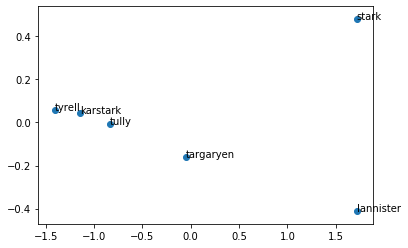

In [52]:
houses = [
          'stark',
          'lannister',
          'targaryen',
          'karstark',
          'tyrell',
          'tully'
]
plotlist(houses)